In [1]:
import pandas as pd
import numpy as np
import ast
import re

In [2]:
import pandas as pd

# Load the CSV file
csv_file = pd.read_csv('data_with_smiles.csv')

test_df = pd.read_csv('expanded_df.csv')

# Define a function to expand rows by tests
def expand_rows_by_tests(df):
    # Create a list to store the expanded rows
    expanded_rows = []
    
    # Iterate through each row in the dataframe
    for _, row in df.iterrows():
        # Iterate through test columns
        for i in range(1, 11):  # Assuming test_1 to test_10
            test_column = f'test_{i}'
            test_data = row[test_column]
            if pd.notnull(test_data):
                try:
                    test_list = ast.literal_eval(test_data)
                    if isinstance(test_list, dict):
                        test_list = [test_list]
                    for test_dict in test_list:
                        new_row = row.drop([f'test_{j}' for j in range(1, 11)])
                        # Add test details to the new row
                        for key, value in test_dict.items():
                            new_row[key] = value
                        expanded_rows.append(new_row)
                except (ValueError, SyntaxError):
                    print(f"Could not parse test data: {test_data}")

    # Create a new dataframe from the expanded rows
    expanded_df = pd.DataFrame(expanded_rows)
    return expanded_df

# Apply the function to expand the rows
expanded_df = expand_rows_by_tests(csv_file)

# remove one row with invalid smiles
expanded_df = expanded_df[expanded_df['passivator_smiles'] != 'FC1=CC=C(C=C1)N(P(=O)(N)N)C1=C(C=CC=C1)OCCF.[I-].N1=C[CH2+]=CC=C1']

In [3]:
def fix_retained_percentage(test_data):
    cont_key = 'retained_percentage_cont'
    tret_key = 'retained_percentage_tret'
    cont = test_data[cont_key] if cont_key in test_data else None 
    tret = test_data[tret_key] if tret_key in test_data else None
    if cont is not None and tret is None:
        test_data['retained_percentage_tret'] = cont
        test_data['retained_percentage_cont'] = None
    return test_data

expanded_df = fix_retained_percentage(expanded_df)

In [4]:
df = expanded_df[['passivator_smiles', 'retained_percentage_cont', 'retained_percentage_tret', 'time', 'temperature' ,
                  'electron_transport_layer', 'pin_nip_structure', 'hole_transport_layer', 'perovskite_composition']]
df = df.dropna(subset=['passivator_smiles', 'retained_percentage_cont', 'retained_percentage_tret'])
df

,passivator_smiles,retained_percentage_cont,retained_percentage_tret,time,temperature,electron_transport_layer,pin_nip_structure,hole_transport_layer,perovskite_composition
0,N(=NC1=CC=CC=C1)C1=CC=CC=C1.[NH4+].[NH4+],90,68,1000,30,PEDOT:PSS,NIP,PCBM,MAPbI3
0,N(=NC1=CC=CC=C1)C1=CC=CC=C1.[NH4+].[NH4+],90,50,1000,30,PEDOT:PSS,NIP,PCBM,MAPbI3
1,[I-].[I-].C(#N)NC(=N)N,77,83,60,None,NaN,NaN,NaN,Cs 0.05 FA 0.9 MA 0.05 PbI 3
6,[Cl-].ClC1=CC=C(C[NH3+])C=C1,78,88,672,None,SnO2,NIP,Spiro-OMeTAD,FA 0.6 MA 0.4 PbI2.7 Cl0.3
9,NC(=O)N,100,100,800,800,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
751,[S-]C#N.[Na+],100,100,15 days,40 ± 5 % relative humidity,SnO2,NIP,spiro-OMeTAD,MAPbI3 and Cs0.06MA0.15FA0.79PbI2.5Br0.5
752,N1C(CCC1)C(=O)N,44.4,60.4,288,85,NaN,NaN,NaN,NaN
752,N1C(CCC1)C(=O)N,49.7,74.0,600,25,NaN,NaN,NaN,NaN
752,N1C(CCC1)C(=O)N,10.0,90.0,1550,25,NaN,NaN,NaN,NaN


In [5]:
df2 = test_df.copy()
df2 = df2.rename(columns={'smiles': 'passivator_smiles'}) 
df2 = df2.rename(columns={'efficiency_cont': 'retained_percentage_cont'}) 
df2 = df2.rename(columns={'efficiency_tret': 'retained_percentage_tret'}) 
df2 = df2.rename(columns={'structure_pin_nip': 'pin_nip_structure'}) 
df2 = df2[['passivator_smiles', 'retained_percentage_cont', 'retained_percentage_tret', 'time', 'temperature',
          'electron_transport_layer', 'pin_nip_structure', 'hole_transport_layer', 'perovskite_composition']]
df2 = df2.dropna(subset=['passivator_smiles', 'retained_percentage_cont', 'retained_percentage_tret'])
df2

,passivator_smiles,retained_percentage_cont,retained_percentage_tret,time,temperature,electron_transport_layer,pin_nip_structure,hole_transport_layer,perovskite_composition
4,[Pb](I)I.C[NH3+].[Ba+2],60.00,90.0,100.0,NaN,C60,NIP,NaN,Cs0.05(MA)0.16(FA)0.79Pb(I0.83Br0.17 )3
5,[Pb](I)I.C[NH3+].[Ba+2],0.00,95.0,100.0,90.0,C60,NIP,NaN,Cs0.05(MA)0.16(FA)0.79Pb(I0.83Br0.17 )3
7,[Pb](I)I.C[NH3+].[Ba+2],40.00,80.0,100.0,65.0,C60,NIP,NaN,Cs0.05(MA)0.16(FA)0.79Pb(I0.83Br0.17 )3
12,[Br-].C(=C)C1=CC=C(C[NH3+])C=C1,60.00,85.0,2000.0,40.0,Tin Oxide,NIP,Spiro-OMeTAD,(FAPbI3)0.94(MAPbBr3)0.06
19,C1=CC=C(C=C1)CCN.I,82.00,92.0,265.0,60.0,PCBM,PIN,2PACz,Cs0.12FA0.8MA0.08PbI1.8Br1
21,[Pb](I)I.C(O[NH2+]CC)CO[NH2+]CC,90.00,100.0,33.0,NaN,"6] -phenyl-C 60 -butyric acid methyl ester,[6",PIN,"4,6-trimethylphenyl) amine],poly[bis(4-phenyl) (2",2-phenylethylammonium iodide
22,[Pb](I)I.C(O[NH2+]CC)CO[NH2+]CC,90.00,100.0,33.0,NaN,"6] -phenyl-C 60 -butyric acid methyl ester,[6",PIN,"4,6-trimethylphenyl) amine],poly[bis(4-phenyl) (2",2-phenylethylammonium iodide
45,[I-].FC1=CC=C(C=C1)CC[NH3+],76.00,87.0,2428.0,55.0,C60,PIN,MeO-2PACZ,Rb0.05Cs0.05MA0.05FA0.85Pb(I0.95Br0.05)3
50,CCCCCCCCN.Br,58.00,85.0,1008.0,85.0,SnO2,NIP,Spiro-OMeTAD,NaN
51,CCCCCCCCN.Br,51.00,75.0,1000.0,85.0,SnO2,NIP,Spiro-OMeTAD,NaN


In [6]:
df.shape, df2.shape

((513, 9), (39, 9))

In [7]:
def clean_pin_nip_structure(df, column_name='pin_nip_structure'):
    # Define a mapping for known categories
    mapping = {
        'NIP': 'NIP',
        'PIN': 'PIN',
        'n-i-p': 'NIP',
        'p-i-n': 'PIN',
        'Inverted': 'PIN',
        'pin': 'PIN',
        'ITO/SnO2/perovskite/Spiro-OMeTAD/Ag': 'NIP'
    }
    
    # Apply the mapping and fill unknowns with 'Other'
    df[column_name] = df[column_name].map(mapping).fillna('Other')
    
    return df

clean_pin_nip_structure(df)
clean_pin_nip_structure(df2)

,passivator_smiles,retained_percentage_cont,retained_percentage_tret,time,temperature,electron_transport_layer,pin_nip_structure,hole_transport_layer,perovskite_composition
4,[Pb](I)I.C[NH3+].[Ba+2],60.00,90.0,100.0,NaN,C60,NIP,NaN,Cs0.05(MA)0.16(FA)0.79Pb(I0.83Br0.17 )3
5,[Pb](I)I.C[NH3+].[Ba+2],0.00,95.0,100.0,90.0,C60,NIP,NaN,Cs0.05(MA)0.16(FA)0.79Pb(I0.83Br0.17 )3
7,[Pb](I)I.C[NH3+].[Ba+2],40.00,80.0,100.0,65.0,C60,NIP,NaN,Cs0.05(MA)0.16(FA)0.79Pb(I0.83Br0.17 )3
12,[Br-].C(=C)C1=CC=C(C[NH3+])C=C1,60.00,85.0,2000.0,40.0,Tin Oxide,NIP,Spiro-OMeTAD,(FAPbI3)0.94(MAPbBr3)0.06
19,C1=CC=C(C=C1)CCN.I,82.00,92.0,265.0,60.0,PCBM,PIN,2PACz,Cs0.12FA0.8MA0.08PbI1.8Br1
21,[Pb](I)I.C(O[NH2+]CC)CO[NH2+]CC,90.00,100.0,33.0,NaN,"6] -phenyl-C 60 -butyric acid methyl ester,[6",PIN,"4,6-trimethylphenyl) amine],poly[bis(4-phenyl) (2",2-phenylethylammonium iodide
22,[Pb](I)I.C(O[NH2+]CC)CO[NH2+]CC,90.00,100.0,33.0,NaN,"6] -phenyl-C 60 -butyric acid methyl ester,[6",PIN,"4,6-trimethylphenyl) amine],poly[bis(4-phenyl) (2",2-phenylethylammonium iodide
45,[I-].FC1=CC=C(C=C1)CC[NH3+],76.00,87.0,2428.0,55.0,C60,PIN,MeO-2PACZ,Rb0.05Cs0.05MA0.05FA0.85Pb(I0.95Br0.05)3
50,CCCCCCCCN.Br,58.00,85.0,1008.0,85.0,SnO2,NIP,Spiro-OMeTAD,NaN
51,CCCCCCCCN.Br,51.00,75.0,1000.0,85.0,SnO2,NIP,Spiro-OMeTAD,NaN


In [8]:
# If it uses C60 as its electron_transport_layer
df['C60'] = (df['electron_transport_layer'] == 'C60')
df['SnO2'] = (df['electron_transport_layer'] == 'SnO2')

# if it uses Spiro-OMeTAD as its hole_transport_layer
df['Spiro-OMeTAD'] = (df['hole_transport_layer'] == 'Spiro-OMeTAD')


# If it uses C60 as its electron_transport_layer
df2['C60'] = (df2['electron_transport_layer'] == 'C60')
df2['SnO2'] = (df2['electron_transport_layer'] == 'SnO2')

# if it uses Spiro-OMeTAD as its hole_transport_layer
df2['Spiro-OMeTAD'] = (df2['hole_transport_layer'] == 'Spiro-OMeTAD')

### model 1: smiles cluster, retained_percentage_cont --> retained_percentage_tret

In [10]:
import pandas as pd
import re

# Function to categorize SMILES strings into four useful categories for ML
def categorize_smiles_for_ml(smiles_list):
    category_columns = ["organic", "functional_group_rich"]
    data = pd.DataFrame(0, index=range(len(smiles_list)), columns=category_columns)
    data.insert(0, "SMILES", smiles_list)
    
    for i, smiles in enumerate(smiles_list):
        if not isinstance(smiles, str) or smiles == "":
            continue

        # Organic category: Contains carbon atoms but not just ions or metals
        data.at[i, "organic"] = 1 if "C" in smiles and not re.search(r'\[.*?\]', smiles) else 0

        # Functional Group Rich: Contains common reactive groups (amines, acids, carbonyls)
        functional_patterns = [r'N', r'C\(=O\)O', r'OH', r'C=O']
        data.at[i, "functional_group_rich"] = 1 if any(re.search(pattern, smiles) for pattern in functional_patterns) else 0

    return data

In [11]:
model_1_train = pd.concat(
    [
        df.reset_index(drop=True), 
        categorize_smiles_for_ml(np.array(df.passivator_smiles))
        .drop('SMILES', axis=1)
        .reset_index(drop=True)
    ], 
    axis=1
)

model_1_test = pd.concat(
    [
        df2.reset_index(drop=True), 
        categorize_smiles_for_ml(np.array(df2.passivator_smiles))
        .drop('SMILES', axis=1)
        .reset_index(drop=True)
    ], 
    axis=1
)

model_1_train.shape, model_1_test.shape

((513, 14), (39, 14))

In [12]:
from sklearn.cluster import KMeans

# Prepare the data for clustering
features = model_1_train[['organic', 'functional_group_rich']]
# smiles = categorized_data_ml["SMILES"]

# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
model_1_train['Cluster'] = kmeans.fit_predict(features)


# Prepare the data for clustering
features = model_1_test[['organic', 'functional_group_rich']]

# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
model_1_test['Cluster'] = kmeans.fit_predict(features)

In [13]:
def clean_percentage(value):
    if pd.isnull(value):
        return np.nan
    if isinstance(value, (int, float)):
        if value < 1:
            return float(value) * 100  # Convert to percentage if under 1
        return float(value)
    
    value = str(value).lower().strip()

    # Handle 'null', 'n/a', etc.
    if value in ['null', 'n/a', 'none', '-', 'na']:
        return np.nan

    # Handle ranges like '80-90%'
    range_match = re.match(r'(\d+)\s*[-–]\s*(\d+)', value)
    if range_match:
        nums = [float(range_match.group(1)), float(range_match.group(2))]
        return np.mean(nums)

    # Handle '70 ± 5%'
    plus_minus_match = re.match(r'(\d+)\s*±\s*(\d+)', value)
    if plus_minus_match:
        return float(plus_minus_match.group(1))

    # Extract single number (with or without %)
    num_match = re.search(r'(\d+\.?\d*)', value)
    if num_match:
        num = float(num_match.group(1))
        if num < 1:
            return num * 100  # Convert to percentage if under 1
        return num

    return np.nan

In [14]:
model_1_train.retained_percentage_cont = model_1_train.retained_percentage_cont.apply(clean_percentage)
model_1_train.retained_percentage_tret = model_1_train.retained_percentage_tret.apply(clean_percentage)

model_1_test.retained_percentage_cont = model_1_test.retained_percentage_cont.apply(clean_percentage)
model_1_test.retained_percentage_tret = model_1_test.retained_percentage_tret.apply(clean_percentage)

In [15]:
model_1_train.dtypes

passivator_smiles            object
retained_percentage_cont    float64
retained_percentage_tret    float64
time                         object
temperature                  object
electron_transport_layer     object
pin_nip_structure            object
hole_transport_layer         object
perovskite_composition       object
C60                            bool
SnO2                           bool
Spiro-OMeTAD                   bool
organic                       int64
functional_group_rich         int64
Cluster                       int32
dtype: object

In [16]:
model_1_train = model_1_train[(model_1_train.retained_percentage_cont <= 100)]
model_1_test = model_1_test[(model_1_test.retained_percentage_cont <= 100)]

In [17]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Define features and target
X_train = model_1_train[['retained_percentage_cont', 'Cluster']]
y_train = model_1_train['retained_percentage_tret']

X_test = model_1_test[['retained_percentage_cont', 'Cluster']]
y_test = model_1_test['retained_percentage_tret']

X_train = pd.get_dummies(X_train, columns=['Cluster'], drop_first=False)
X_test = pd.get_dummies(X_test, columns=['Cluster'], drop_first=False)



# Define parameter grids for each model
param_grids = {
    'RandomForest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    },
    'GradientBoosting': {
        'n_estimators': [100, 200, 500],
        'max_depth': [3, 5, 10],
        'learning_rate': [0.01, 0.1, 0.2]
    },
    'Lasso': {
        'alpha': [0.1, 1, 10, 100],
        'max_iter': [1000, 5000]
    },
    'Ridge': {
        'alpha': [0.1, 1, 10, 100]
    },
    'KNRegressor': {
        'n_neighbors': [3, 5, 10, 20],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    }
}

# Initialize models
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'Lasso': Lasso(random_state=42),
    'Ridge': Ridge(random_state=42),
    'KNRegressor': KNeighborsRegressor()
}

# Store the results
model_results = []
model_predictions = {}

# Iterate over models and perform GridSearchCV
for model_name, model in models.items():
    print(f"Training and tuning {model_name}...")
    grid_search = GridSearchCV(
        estimator=model, 
        param_grid=param_grids[model_name], 
        cv=5, 
        n_jobs=-1, 
        scoring='r2'
    )
    
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.best_estimator_.predict(X_test)
    model_predictions[model_name] = y_pred
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    model_results.append({
        'Model': model_name,
        'Best Parameters': grid_search.best_params_,
        'MSE': mse,
        'MAE': mae,
        'R2': r2
    })

# Display the results in a DataFrame
results_df = pd.DataFrame(model_results).sort_values(by='R2', ascending=False)
print(results_df)

# Feature Importance for tree-based models
for model_name, model in models.items():
    if hasattr(grid_search.best_estimator_, 'feature_importances_'):
        feature_importances = pd.DataFrame({
            'Feature': X.columns,
            'Importance': grid_search.best_estimator_.feature_importances_
        }).sort_values(by='Importance', ascending=False)
        
        print(f"\nTop Features for {model_name}:")
        print(feature_importances.head(10))

Training and tuning RandomForest...
Training and tuning GradientBoosting...
Training and tuning Lasso...
Training and tuning Ridge...
Training and tuning KNRegressor...
              Model                                    Best Parameters  \
1  GradientBoosting  {'learning_rate': 0.01, 'max_depth': 3, 'n_est...   
3             Ridge                                      {'alpha': 10}   
2             Lasso                   {'alpha': 0.1, 'max_iter': 1000}   
0      RandomForest  {'bootstrap': True, 'max_depth': 10, 'min_samp...   
4       KNRegressor  {'n_neighbors': 20, 'p': 2, 'weights': 'uniform'}   

          MSE        MAE        R2  
1  119.300447   9.560782 -0.326471  
3  134.000581   9.105324 -0.489918  
2  136.402703   9.243516 -0.516627  
0  171.031879  10.502463 -0.901660  
4  220.430102  12.065244 -1.450906  


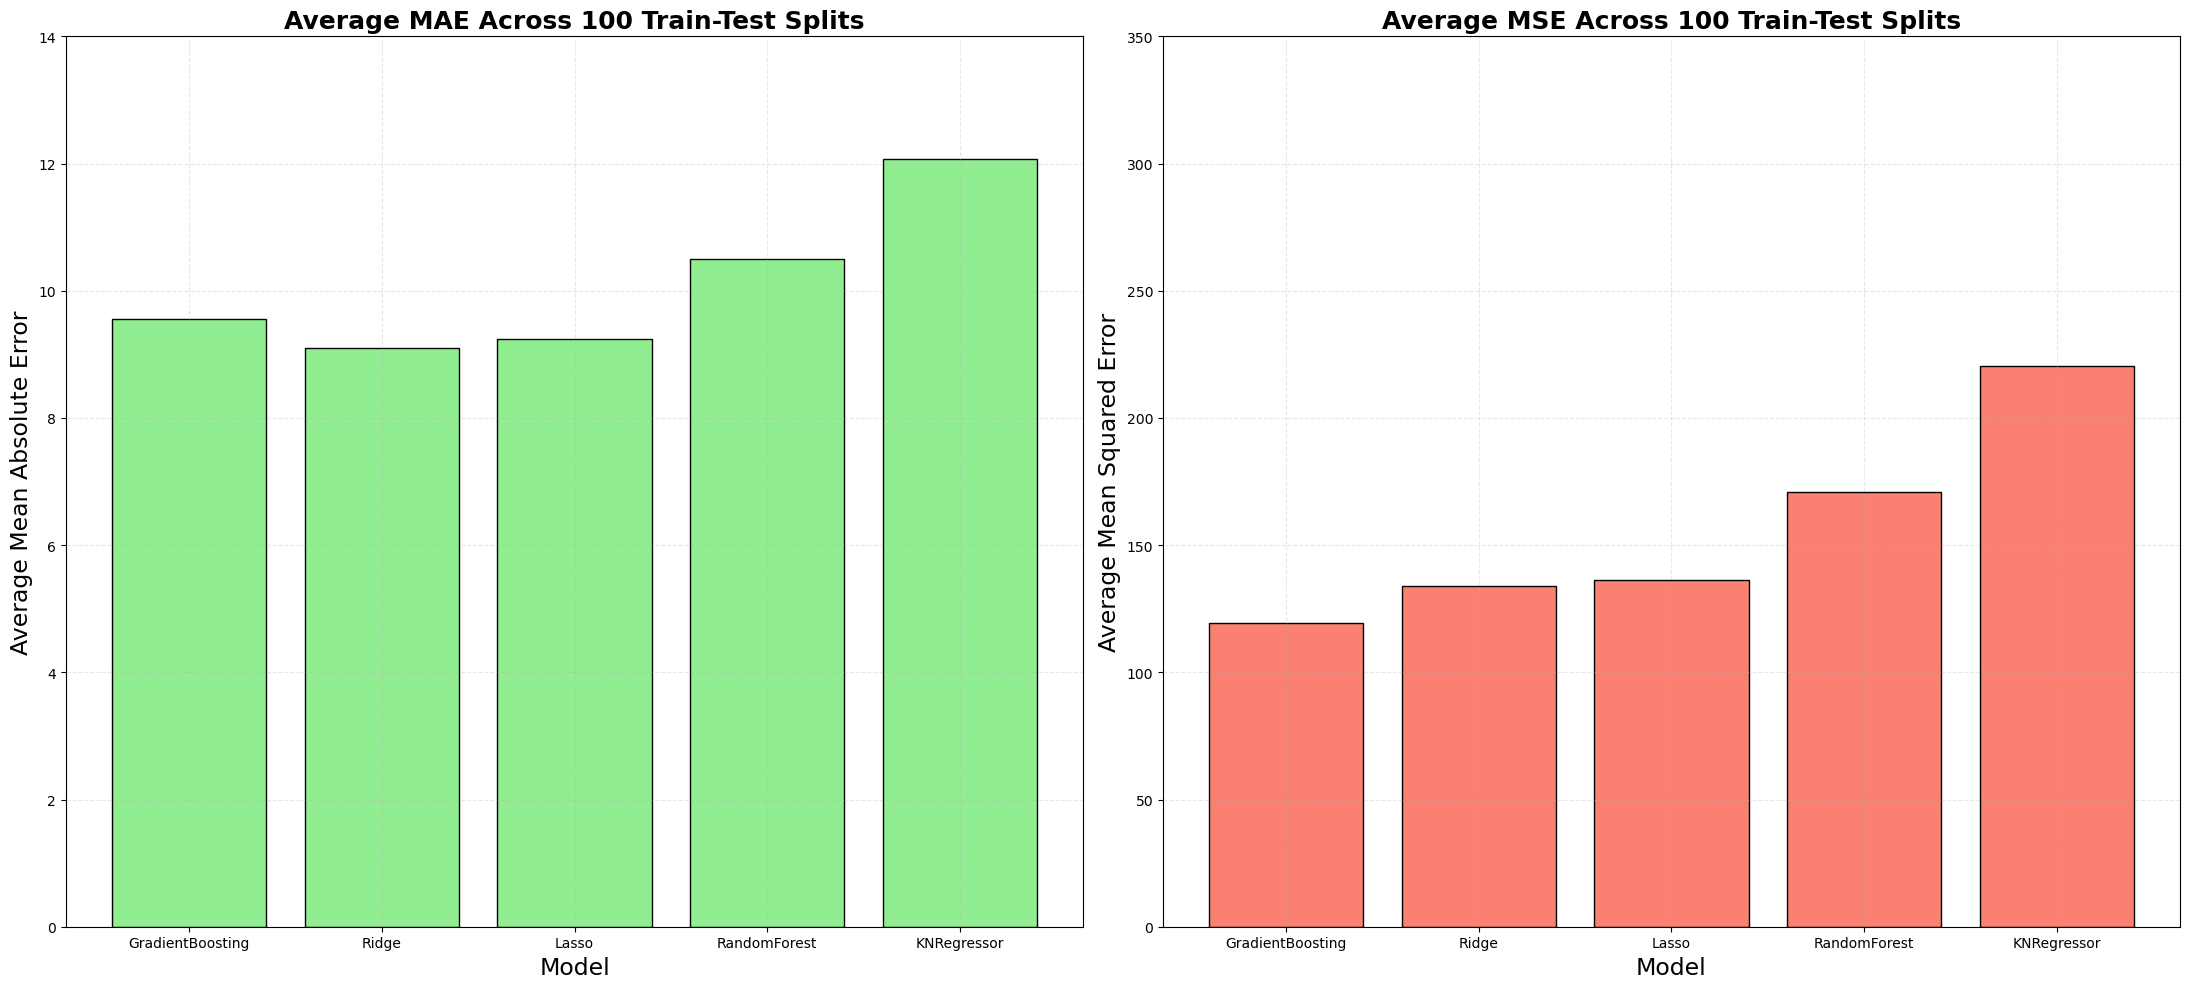

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define consistent colors for each metric
color_mae = 'lightgreen'
color_mse = 'salmon'
color_r2 = 'skyblue'

# Create bar plots for MAE and MSE in one figure
fig, axes = plt.subplots(1, 2, figsize=(22, 10))

# MAE
axes[0].bar(results_df['Model'], results_df['MAE'], color=color_mae, edgecolor='black')
axes[0].set_title('Average MAE Across 100 Train-Test Splits', fontsize=18, fontweight='bold')
axes[0].set_xlabel('Model', fontsize=17)
axes[0].set_ylabel('Average Mean Absolute Error', fontsize=17)
axes[0].set_ylim([0, 14])
axes[0].grid(True, linestyle='--', alpha=0.3)

# MSE
axes[1].bar(results_df['Model'], results_df['MSE'], color=color_mse, edgecolor='black')
axes[1].set_title('Average MSE Across 100 Train-Test Splits', fontsize=18, fontweight='bold')
axes[1].set_xlabel('Model', fontsize=17)
axes[1].set_ylabel('Average Mean Squared Error', fontsize=17)
axes[1].set_ylim([0, 350])
axes[1].grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.savefig('stability_approach_1_mae_mse.png', dpi=200)
plt.show()

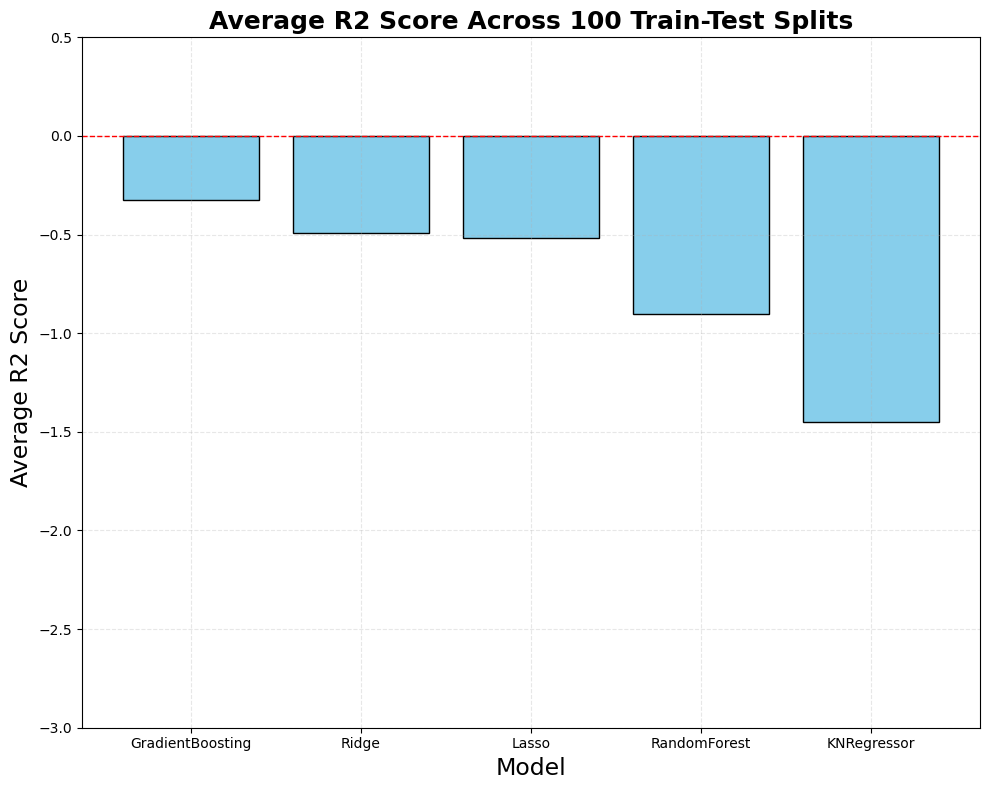

In [19]:
plt.figure(figsize=(10, 8))
plt.bar(results_df['Model'], results_df['R2'], color=color_r2, edgecolor='black')
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Add zero line
plt.title('Average R2 Score Across 100 Train-Test Splits', fontsize=18, fontweight='bold')
plt.xlabel('Model', fontsize=17)
plt.ylabel('Average R2 Score', fontsize=17)
plt.ylim([-0.5, 0.5])
plt.yticks(np.arange(-3, 0.6, 0.5))
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig('stability_approach_1_r2.png', dpi=200)
plt.show()

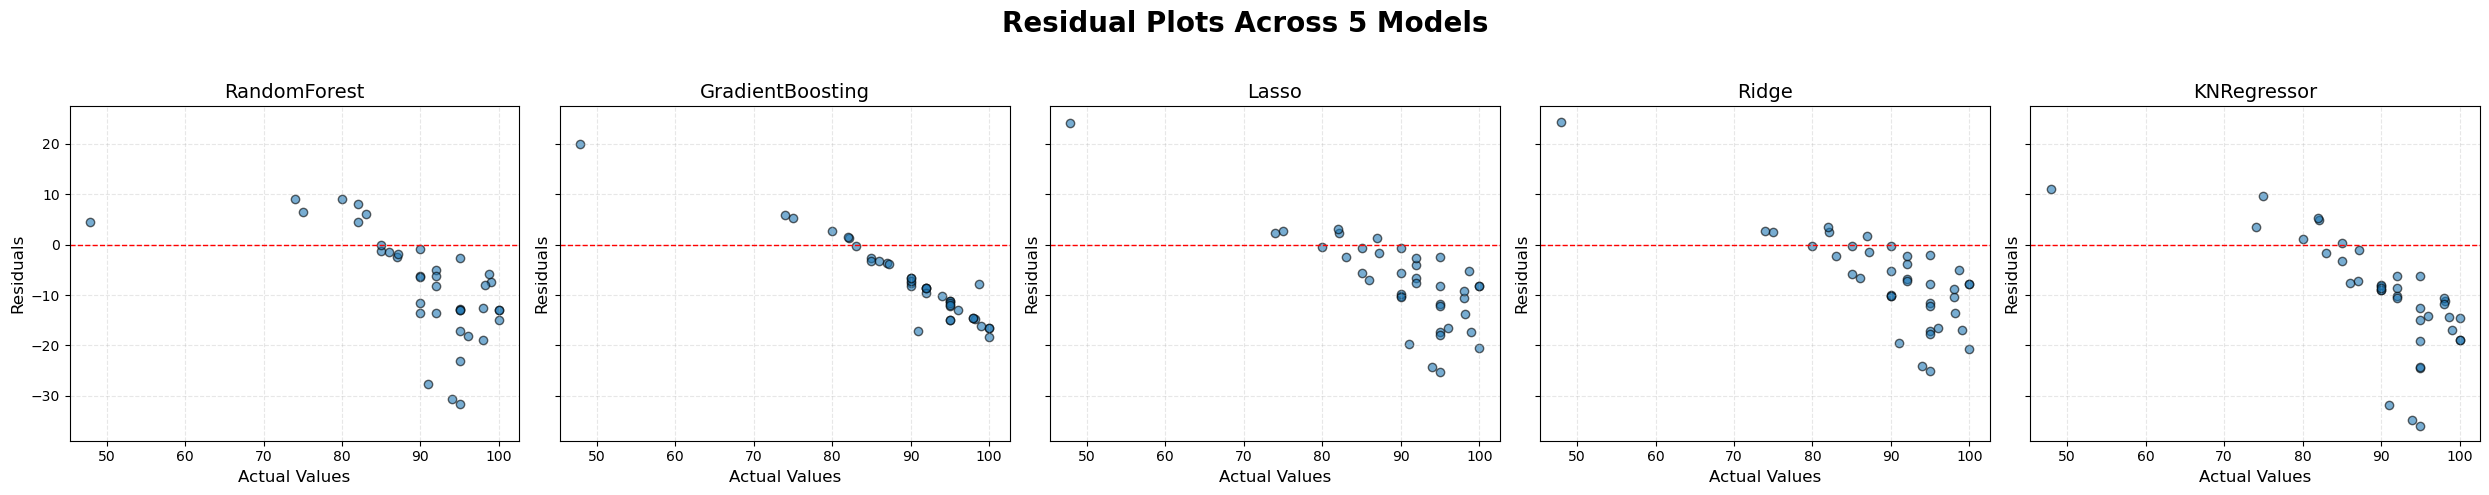

In [20]:
import matplotlib.pyplot as plt

# Residual Plots for Each Model (1x5 layout)
fig, axes = plt.subplots(1, 5, figsize=(25, 5), sharey=True)

# Plot residuals for each model
for ax, (model_name, y_pred) in zip(axes, model_predictions.items()):
    ax.scatter(y_test, y_pred - y_test, alpha=0.6, edgecolor='k')
    ax.axhline(0, color='red', linestyle='--', linewidth=1)
    ax.set_title(model_name, fontsize=14)
    ax.set_xlabel('Actual Values', fontsize=12)
    ax.set_ylabel('Residuals', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.3)

# Add a main title to the entire figure
fig.suptitle('Residual Plots Across 5 Models', fontsize=20, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make space for the main title
plt.savefig('stability_approach_1_residual.png', dpi=200)
plt.show()

### model 2: smiles cluster, time, temp retained_percentage_cont --> retained_percentage_tret

In [22]:
import pandas as pd
import re

# Define the conversion functions
def convert_values(values, value_type):
    def convert_temperature(value):
        if isinstance(value, (int, float)):
            return value
        value = str(value).strip().lower()
        
        if '-' in value:
            try:
                parts = value.split('-')
                return (float(parts[0]) + float(parts[1])) / 2
            except ValueError:
                return None
        
        if '±' in value:
            try:
                num = float(value.split('±')[0].strip())
                return num
            except ValueError:
                return None
        
        if 'room temperature' in value or 'ambient' in value:
            return 25.0
        
        temp_match = re.match(r"(\d+)(°[cfk]+)?", value)
        if temp_match:
            return float(temp_match.group(1))
        
        return None

    def convert_time(value):
        if isinstance(value, (int, float)):
            return value
        value = str(value).strip().lower()

        if 'h' in value or 'hour' in value:
            try:
                return float(value.replace('h', '').replace('hour', '').strip())
            except ValueError:
                return None
        
        if 'days' in value:
            try:
                return float(value.replace('days', '').strip()) * 24
            except ValueError:
                return None
        if 'weeks' in value:
            try:
                return float(value.replace('weeks', '').strip()) * 7 * 24
            except ValueError:
                return None
        if 'months' in value:
            try:
                return float(value.replace('months', '').strip()) * 30 * 24
            except ValueError:
                return None
        if 'min' in value or 'minute' in value:
            try:
                return float(value.replace('min', '').replace('minute', '').strip()) / 60
            except ValueError:
                return None
        if 's' in value or 'second' in value:
            try:
                return float(value.replace('s', '').replace('second', '').strip()) / 3600
            except ValueError:
                return None

        return None

    def convert_humidity(value):
        if isinstance(value, (int, float)):
            return value
        value = str(value).strip().lower()

        # Handle ranges like "30-40%" and "20-30% RH"
        if '-' in value and '%' in value:
            try:
                parts = value.split('-')
                return (float(parts[0].replace('%', '').strip()) + float(parts[1].replace('%', '').strip())) / 2
            except ValueError:
                return None
        
        # Handle values with ± like "50 ± 5%" or "70 ± 5% RH"
        if '±' in value:
            try:
                num = float(value.split('±')[0].replace('%', '').strip())
                return num
            except ValueError:
                return None

        # Handle percentages like "45%" or "80 %"
        if '%' in value:
            try:
                return float(value.replace('%', '').strip())
            except ValueError:
                return None

        # Handle specific strings like "ambient", "dry", "high", "low"
        if 'ambient' in value:
            return 52.0  # Arbitrary average value for ambient humidity
        if 'dry' in value:
            return 0.1  # Dry air, 0% RH
        if 'high' in value:
            return 72.0  # High humidity, arbitrary value like 70%
        if 'low' in value:
            return 22.0  # Low humidity, arbitrary value like 20%
        if 'n2' in value:  # For N2 atmosphere or N2 glove box
            return 0.2  # Typically low humidity in inert atmospheres

        # Handle descriptive strings like "moist air with 70 ± 5% RH"
        if 'rh' in value:
            try:
                num = re.search(r"(\d+(\.\d+)?)", value)
                if num:
                    return float(num.group(1))
            except ValueError:
                return None
        
        return None

    def process_values(values, value_type):
        if value_type == "temperature":
            return [convert_temperature(v) for v in values]
        elif value_type == "time":
            return [convert_time(v) for v in values]
        elif value_type == "humidity":
            return [convert_humidity(v) for v in values]
        else:
            return []

    return process_values(values, value_type)
    

model_2_train = model_1_train.copy()
model_2_test = model_1_test.copy()

for col in ['temperature', 'time']:
    model_2_train[col] = model_1_train[col].apply(lambda x: convert_values([x], col)[0])
    model_2_test[col] = model_1_test[col].apply(lambda x: convert_values([x], col)[0])  

In [23]:
model_2_train = model_2_train[(model_2_train.time >= 500)  & (model_2_train.temperature >= 60)]
model_2_test = model_2_test[(model_2_test.time >= 500)  & (model_2_test.temperature >= 60)]

In [24]:
model_2_train.shape

(68, 15)

In [25]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Define features and target
X_train = model_2_train[['retained_percentage_cont', 'Cluster', 'time', 'temperature']]
y_train = model_2_train['retained_percentage_tret']
X_test = model_2_test[['retained_percentage_cont', 'Cluster', 'time', 'temperature']]
y_test = model_2_test['retained_percentage_tret']

X_train = pd.get_dummies(X_train, columns=['Cluster'], drop_first=False)
X_test = pd.get_dummies(X_test, columns=['Cluster'], drop_first=False)

# Define parameter grids for each model
param_grids = {
    'RandomForest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    },
    'GradientBoosting': {
        'n_estimators': [100, 200, 500],
        'max_depth': [3, 5, 10],
        'learning_rate': [0.01, 0.1, 0.2]
    },
    'Lasso': {
        'alpha': [0.1, 1, 10, 100],
        'max_iter': [1000, 5000]
    },
    'Ridge': {
        'alpha': [0.1, 1, 10, 100]
    },
    'KNRegressor': {
        'n_neighbors': [3, 5, 10, 20],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    }
}

# Initialize models
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'Lasso': Lasso(random_state=42),
    'Ridge': Ridge(random_state=42),
    'KNRegressor': KNeighborsRegressor()
}

# Store the results
model_results = []
model_predictions = {}


# Iterate over models and perform GridSearchCV
for model_name, model in models.items():
    print(f"Training and tuning {model_name}...")
    grid_search = GridSearchCV(
        estimator=model, 
        param_grid=param_grids[model_name], 
        cv=5, 
        n_jobs=-1, 
        scoring='r2'
    )
    
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.best_estimator_.predict(X_test)
    model_predictions[model_name] = y_pred
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    model_results.append({
        'Model': model_name,
        'Best Parameters': grid_search.best_params_,
        'MSE': mse,
        'MAE': mae,
        'R2': r2
    })

# Display the results in a DataFrame
results_df = pd.DataFrame(model_results).sort_values(by='R2', ascending=False)
print(results_df)

# Feature Importance for tree-based models
for model_name, model in models.items():
    if hasattr(grid_search.best_estimator_, 'feature_importances_'):
        feature_importances = pd.DataFrame({
            'Feature': X.columns,
            'Importance': grid_search.best_estimator_.feature_importances_
        }).sort_values(by='Importance', ascending=False)
        
        print(f"\nTop Features for {model_name}:")
        print(feature_importances.head(10))

Training and tuning RandomForest...
Training and tuning GradientBoosting...
Training and tuning Lasso...
Training and tuning Ridge...
Training and tuning KNRegressor...
              Model                                    Best Parameters  \
4       KNRegressor  {'n_neighbors': 20, 'p': 1, 'weights': 'distan...   
1  GradientBoosting  {'learning_rate': 0.01, 'max_depth': 5, 'n_est...   
2             Lasso                   {'alpha': 100, 'max_iter': 1000}   
0      RandomForest  {'bootstrap': True, 'max_depth': None, 'min_sa...   
3             Ridge                                       {'alpha': 1}   

          MSE        MAE        R2  
4   76.576361   7.453000 -0.125273  
1   83.968464   7.586358 -0.233898  
2  122.894854   9.341067 -0.805913  
0  191.609772   9.778086 -1.815664  
3  264.317363  11.677832 -2.884087  


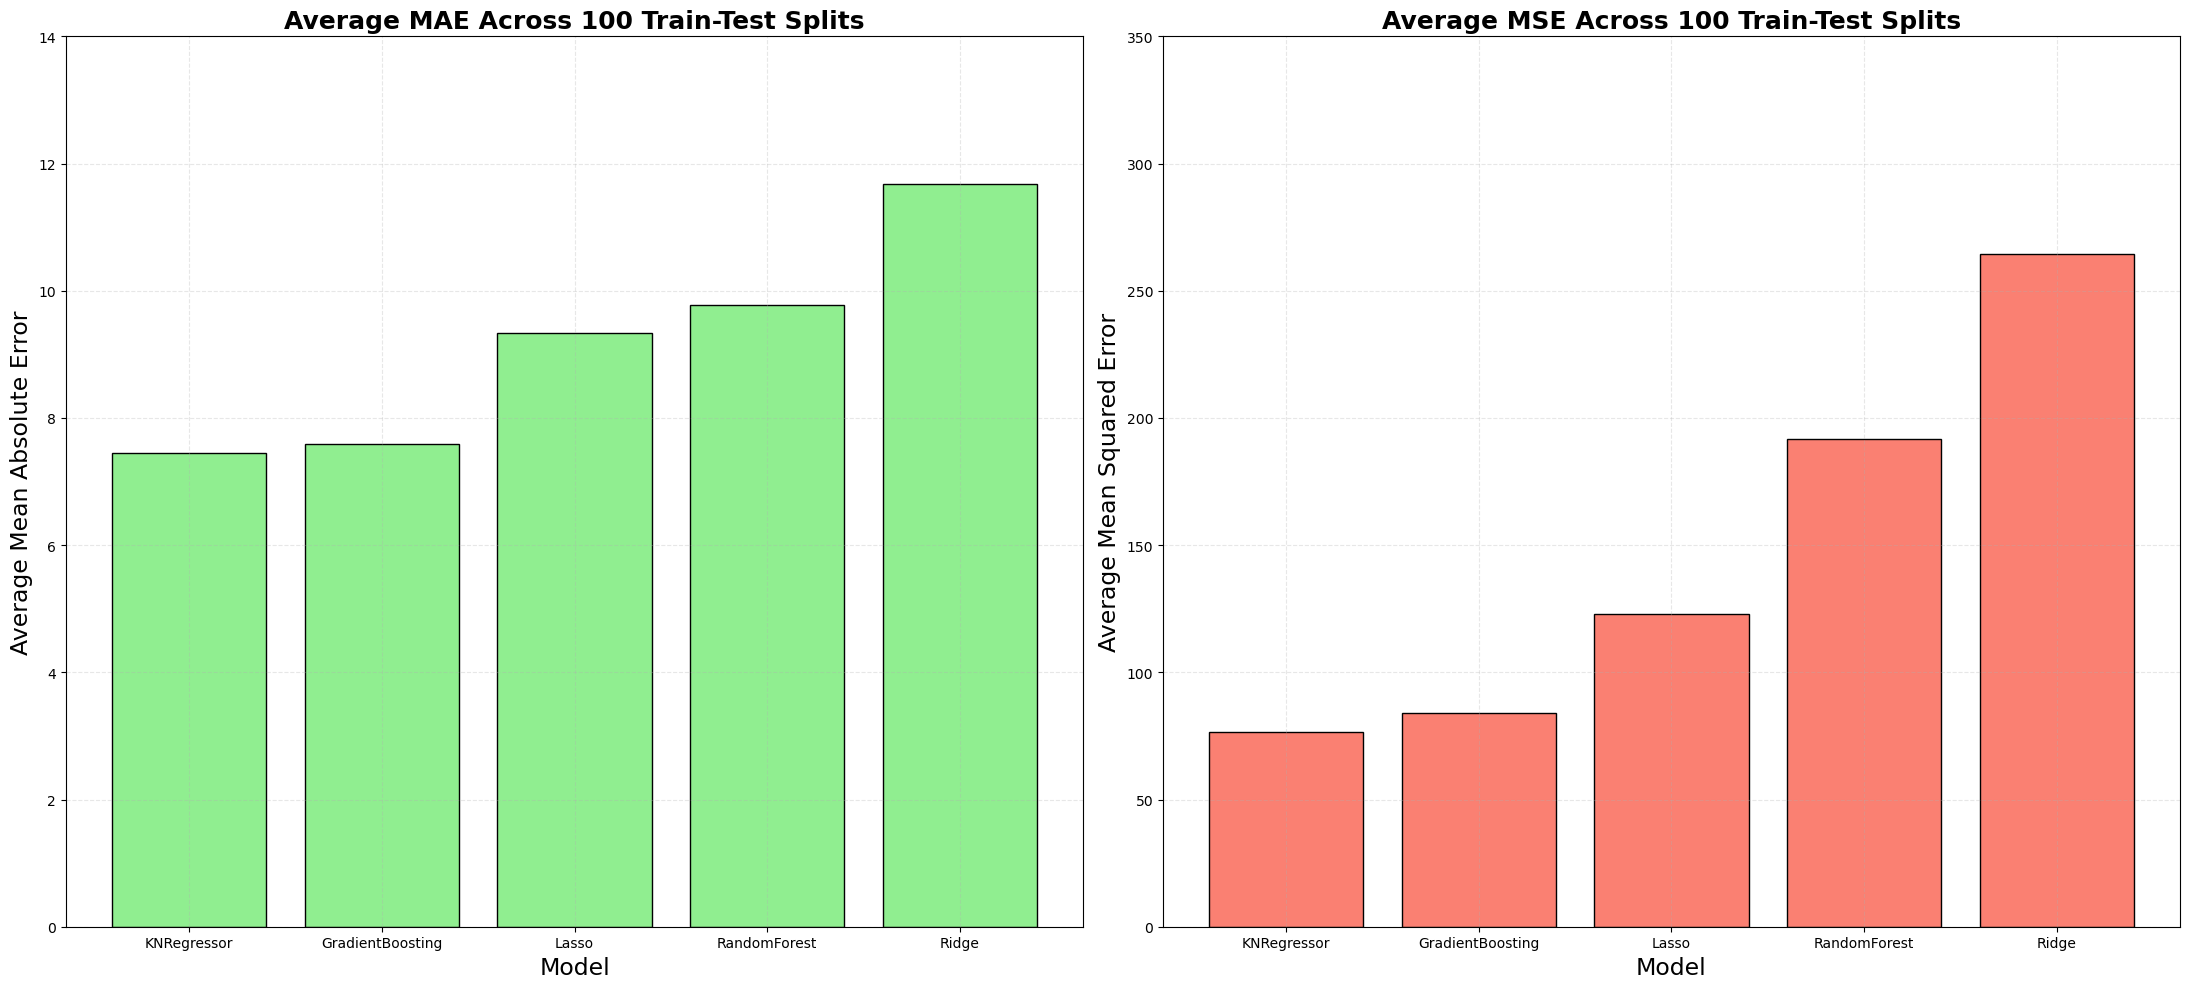

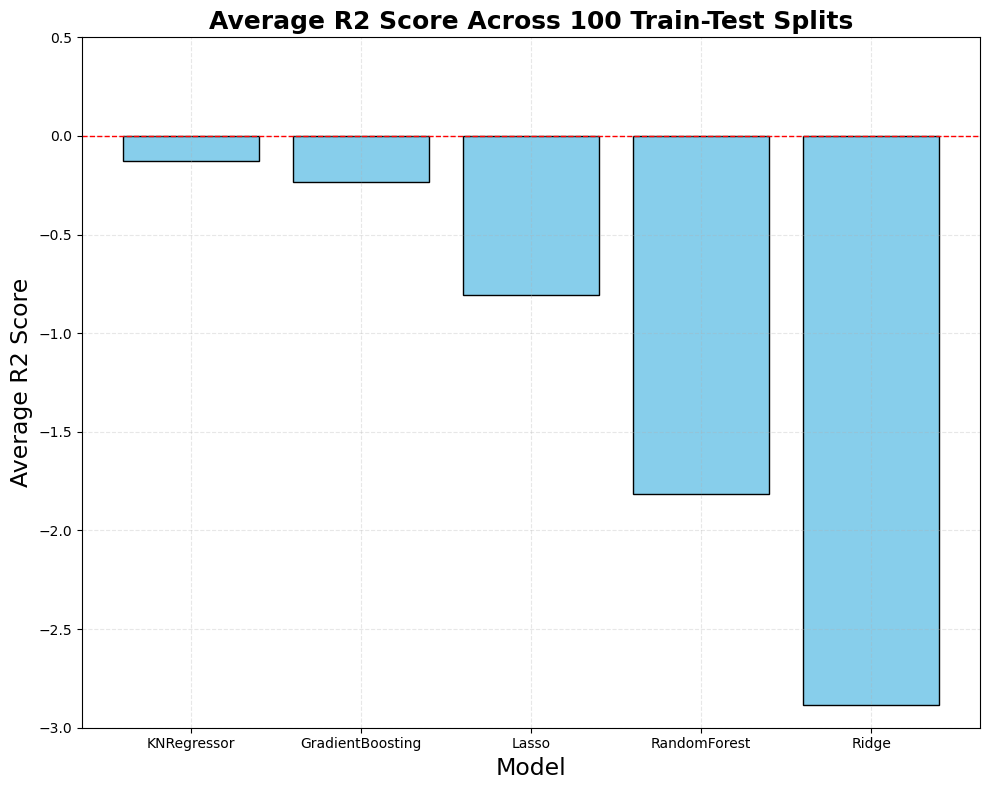

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define consistent colors for each metric
color_mae = 'lightgreen'
color_mse = 'salmon'
color_r2 = 'skyblue'

# Create bar plots for MAE and MSE in one figure
fig, axes = plt.subplots(1, 2, figsize=(22, 10))

# MAE
axes[0].bar(results_df['Model'], results_df['MAE'], color=color_mae, edgecolor='black')
axes[0].set_title('Average MAE Across 100 Train-Test Splits', fontsize=18, fontweight='bold')
axes[0].set_xlabel('Model', fontsize=17)
axes[0].set_ylabel('Average Mean Absolute Error', fontsize=17)
axes[0].set_ylim([0, 14])
axes[0].grid(True, linestyle='--', alpha=0.3)

# MSE
axes[1].bar(results_df['Model'], results_df['MSE'], color=color_mse, edgecolor='black')
axes[1].set_title('Average MSE Across 100 Train-Test Splits', fontsize=18, fontweight='bold')
axes[1].set_xlabel('Model', fontsize=17)
axes[1].set_ylabel('Average Mean Squared Error', fontsize=17)
axes[1].set_ylim([0, 350])
axes[1].grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
plt.bar(results_df['Model'], results_df['R2'], color=color_r2, edgecolor='black')
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Add zero line
plt.title('Average R2 Score Across 100 Train-Test Splits', fontsize=18, fontweight='bold')
plt.xlabel('Model', fontsize=17)
plt.ylabel('Average R2 Score', fontsize=17)
plt.ylim([-0.5, 0.5])
plt.yticks(np.arange(-3, 0.6, 0.5))
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

### model 3: smiles features, retained_percentage_cont --> retained_percentage_tret

In [28]:
from rdkit import Chem
from rdkit.Chem import Descriptors, rdMolDescriptors
import numpy as np

def compute_molecular_features(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            # Check if the molecule is valid (e.g., no isolated hydrogens)
            if len(mol.GetAtoms()) == 0:
                return [np.nan] * 30
            
            return [
                Descriptors.MolWt(mol),  # Molecular weight
                Descriptors.ExactMolWt(mol),  # Exact molecular weight (isotope-specific)
                Descriptors.MolLogP(mol),  # LogP (lipophilicity)
                Descriptors.TPSA(mol),  # Topological Polar Surface Area
                Descriptors.NumValenceElectrons(mol),  # Total valence electrons
                rdMolDescriptors.CalcNumRotatableBonds(mol),  # Rotatable bonds
                rdMolDescriptors.CalcNumHBA(mol),  # Hydrogen bond acceptors
                rdMolDescriptors.CalcNumHBD(mol),  # Hydrogen bond donors
                rdMolDescriptors.CalcFractionCSP3(mol),  # Fraction of sp3 carbons
                rdMolDescriptors.CalcNumAromaticRings(mol),  # Number of aromatic rings
                rdMolDescriptors.CalcNumSaturatedRings(mol),  # Number of saturated rings
                rdMolDescriptors.CalcNumHeteroatoms(mol),  # Number of heteroatoms
                rdMolDescriptors.CalcNumHeavyAtoms(mol),  # Number of heavy atoms
                rdMolDescriptors.CalcNumSpiroAtoms(mol),  # Number of spiro atoms
                rdMolDescriptors.CalcNumBridgeheadAtoms(mol),  # Number of bridgehead atoms
                Descriptors.FpDensityMorgan1(mol),  # Morgan fingerprint density (radius=1)
                Descriptors.FpDensityMorgan2(mol),  # Morgan fingerprint density (radius=2)
                Descriptors.FpDensityMorgan3(mol),  # Morgan fingerprint density (radius=3)
                Descriptors.qed(mol),  # Quantitative Estimate of Drug-likeness
                rdMolDescriptors.CalcNumLipinskiHBA(mol),  # Lipinski Hydrogen Bond Acceptors
                rdMolDescriptors.CalcNumLipinskiHBD(mol),  # Lipinski Hydrogen Bond Donors
                rdMolDescriptors.CalcNumRings(mol),  # Total number of rings
                rdMolDescriptors.CalcNumAmideBonds(mol),  # Number of amide bonds
                Descriptors.BalabanJ(mol),  # Balaban’s connectivity index
                Descriptors.BertzCT(mol),  # Bertz complexity
                Descriptors.Chi0(mol),  # Chi connectivity index (order 0)
                Descriptors.Chi1(mol),  # Chi connectivity index (order 1)
                Descriptors.Chi2n(mol),  # Chi connectivity index (order 2, non-H)
                Descriptors.Kappa1(mol),  # Kappa Shape Index (order 1)
                Descriptors.Kappa2(mol),  # Kappa Shape Index (order 2)
            ]
        else:
            return [np.nan] * 30
    except Exception as e:
        print(f"Error processing SMILES {smiles}: {e}")
        return [np.nan] * 30

In [29]:
# Apply function to dataset
mol_features = model_1_train['passivator_smiles'].apply(compute_molecular_features)

# Convert list to DataFrame
mol_features_df = pd.DataFrame(mol_features.tolist(), 
                               columns=[
                                   'MolWt', 'ExactMolWt', 'LogP', 'TPSA', 'NumValenceElectrons',
                                   'NumRotBonds', 'NumHBA', 'NumHBD', 'FractionCSP3', 'AromaticRings',
                                   'SaturatedRings', 'Heteroatoms', 'HeavyAtoms', 'SpiroAtoms', 
                                   'BridgeheadAtoms', 'FpDensityMorgan1', 'FpDensityMorgan2', 
                                   'FpDensityMorgan3', 'QED', 'LipinskiHBA', 
                                   'LipinskiHBD', 'NumRings', 'NumAmideBonds', 'BalabanJ', 
                                   'BertzCT', 'Chi0', 'Chi1', 'Chi2n', 'Kappa1', 'Kappa2'
                               ],
                               index=model_1_train.index)

# Merge with original dataset
model_3_train = pd.concat([model_1_train.copy(), mol_features_df], axis=1)
model_3_train = model_3_train.dropna(subset=['passivator_smiles'])
model_3_train.head()

[18:36:24] WARNING: not removing hydrogen atom without neighbors
[18:36:24] WARNING: not removing hydrogen atom without neighbors


,passivator_smiles,retained_percentage_cont,retained_percentage_tret,time,temperature,electron_transport_layer,pin_nip_structure,hole_transport_layer,perovskite_composition,C60,...,LipinskiHBD,NumRings,NumAmideBonds,BalabanJ,BertzCT,Chi0,Chi1,Chi2n,Kappa1,Kappa2
0,N(=NC1=CC=CC=C1)C1=CC=CC=C1.[NH4+].[NH4+],90.0,68.0,1000,30,PEDOT:PSS,NIP,PCBM,MAPbI3,False,...,8,2,0,1.125000e-06,370.048598,9.639982,6.949490,2.871098,13.960000,7.277825
1,N(=NC1=CC=CC=C1)C1=CC=CC=C1.[NH4+].[NH4+],90.0,50.0,1000,30,PEDOT:PSS,NIP,PCBM,MAPbI3,False,...,8,2,0,1.125000e-06,370.048598,9.639982,6.949490,2.871098,13.960000,7.277825
2,[I-].[I-].C(#N)NC(=N)N,77.0,83.0,60,None,NaN,Other,NaN,Cs 0.05 FA 0.9 MA 0.05 PbI 3,False,...,4,0,0,-1.250000e-07,94.701658,4.991564,2.770056,0.650479,15.725527,10.251253
3,[Cl-].ClC1=CC=C(C[NH3+])C=C1,78.0,88.0,672,None,SnO2,NIP,Spiro-OMeTAD,FA 0.6 MA 0.4 PbI2.7 Cl0.3,False,...,3,1,0,8.099999e-07,183.302524,6.690234,4.325699,1.876466,9.760000,4.556202
4,NC(=O)N,100.0,100.0,800,800,NaN,Other,NaN,NaN,False,...,4,0,2,2.803039e+00,29.019550,3.577350,1.732051,0.402369,3.270000,0.710529


In [30]:
# Apply function to dataset
mol_features = model_1_test['passivator_smiles'].apply(compute_molecular_features)

# Convert list to DataFrame
mol_features_df = pd.DataFrame(mol_features.tolist(), 
                               columns=[
                                   'MolWt', 'ExactMolWt', 'LogP', 'TPSA', 'NumValenceElectrons',
                                   'NumRotBonds', 'NumHBA', 'NumHBD', 'FractionCSP3', 'AromaticRings',
                                   'SaturatedRings', 'Heteroatoms', 'HeavyAtoms', 'SpiroAtoms', 
                                   'BridgeheadAtoms', 'FpDensityMorgan1', 'FpDensityMorgan2', 
                                   'FpDensityMorgan3', 'QED', 'LipinskiHBA', 
                                   'LipinskiHBD', 'NumRings', 'NumAmideBonds', 'BalabanJ', 
                                   'BertzCT', 'Chi0', 'Chi1', 'Chi2n', 'Kappa1', 'Kappa2'
                               ],
                               index=model_1_test.index)

# Merge with original dataset
model_3_test = pd.concat([model_1_test.copy(), mol_features_df], axis=1)
model_3_test = model_3_test.dropna(subset=['passivator_smiles'])
model_3_test.head()

,passivator_smiles,retained_percentage_cont,retained_percentage_tret,time,temperature,electron_transport_layer,pin_nip_structure,hole_transport_layer,perovskite_composition,C60,...,LipinskiHBD,NumRings,NumAmideBonds,BalabanJ,BertzCT,Chi0,Chi1,Chi2n,Kappa1,Kappa2
0,[Pb](I)I.C[NH3+].[Ba+2],60.0,90.0,100.0,NaN,C60,NIP,NaN,Cs0.05(MA)0.16(FA)0.79Pb(I0.83Br0.17 )3,True,...,3,0,0,-2.750000e-08,13.509775,4.707107,2.414214,0.071429,16.478881,23.120831
1,[Pb](I)I.C[NH3+].[Ba+2],0.0,95.0,100.0,90.0,C60,NIP,NaN,Cs0.05(MA)0.16(FA)0.79Pb(I0.83Br0.17 )3,True,...,3,0,0,-2.750000e-08,13.509775,4.707107,2.414214,0.071429,16.478881,23.120831
2,[Pb](I)I.C[NH3+].[Ba+2],40.0,80.0,100.0,65.0,C60,NIP,NaN,Cs0.05(MA)0.16(FA)0.79Pb(I0.83Br0.17 )3,True,...,3,0,0,-2.750000e-08,13.509775,4.707107,2.414214,0.071429,16.478881,23.120831
3,[Br-].C(=C)C1=CC=C(C[NH3+])C=C1,60.0,85.0,2000.0,40.0,Tin Oxide,NIP,Spiro-OMeTAD,(FAPbI3)0.94(MAPbBr3)0.06,False,...,3,1,0,9.999998e-07,215.509272,7.397341,4.863703,2.195706,10.400000,5.103601
4,C1=CC=C(C=C1)CCN.I,82.0,92.0,265.0,60.0,PCBM,PIN,2PACz,Cs0.12FA0.8MA0.08PbI1.8Br1,False,...,2,1,0,8.099999e-07,162.168377,6.527098,4.431852,2.024274,9.910000,5.676536


In [31]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

smiles_feature=[
   'MolWt', 'ExactMolWt', 'LogP', 'TPSA', 'NumValenceElectrons',
   'NumRotBonds', 'NumHBA', 'NumHBD', 'FractionCSP3', 'AromaticRings',
   'SaturatedRings', 'Heteroatoms', 'HeavyAtoms', 'SpiroAtoms', 
   'BridgeheadAtoms', 'FpDensityMorgan1', 'FpDensityMorgan2', 
   'FpDensityMorgan3', 'QED', 'LipinskiHBA', 
   'LipinskiHBD', 'NumRings', 'NumAmideBonds', 'BalabanJ', 
   'BertzCT', 'Chi0', 'Chi1', 'Chi2n', 'Kappa1', 'Kappa2'
]

# Define features and target
X_train = model_3_train[['retained_percentage_cont', 'Cluster'] + smiles_feature]
y_train = model_3_train['retained_percentage_tret']
X_test = model_3_test[['retained_percentage_cont', 'Cluster'] + smiles_feature]
y_test = model_3_test['retained_percentage_tret']

X_train = pd.get_dummies(X_train, columns=['Cluster'], drop_first=False)
X_test = pd.get_dummies(X_test, columns=['Cluster'], drop_first=False)

# Define parameter grids for each model
param_grids = {
    'RandomForest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    },
    'GradientBoosting': {
        'n_estimators': [100, 200, 500],
        'max_depth': [3, 5, 10],
        'learning_rate': [0.01, 0.1, 0.2]
    },
    'Lasso': {
        'alpha': [0.1, 1, 10, 100],
        'max_iter': [1000, 5000]
    },
    'Ridge': {
        'alpha': [0.1, 1, 10, 100]
    },
    'KNRegressor': {
        'n_neighbors': [3, 5, 10, 20],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    }
}

# Initialize models
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'Lasso': Lasso(random_state=42),
    'Ridge': Ridge(random_state=42),
    'KNRegressor': KNeighborsRegressor()
}

# Store the results
model_results = []

# Iterate over models and perform GridSearchCV
for model_name, model in models.items():
    print(f"Training and tuning {model_name}...")
    grid_search = GridSearchCV(
        estimator=model, 
        param_grid=param_grids[model_name], 
        cv=5, 
        n_jobs=-1, 
        scoring='r2'
    )
    
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.best_estimator_.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    model_results.append({
        'Model': model_name,
        'Best Parameters': grid_search.best_params_,
        'MSE': mse,
        'MAE': mae,
        'R2': r2
    })

# Display the results in a DataFrame
results_df = pd.DataFrame(model_results).sort_values(by='R2', ascending=False)
print(results_df)

# Feature Importance for tree-based models
for model_name, model in models.items():
    if hasattr(grid_search.best_estimator_, 'feature_importances_'):
        feature_importances = pd.DataFrame({
            'Feature': X.columns,
            'Importance': grid_search.best_estimator_.feature_importances_
        }).sort_values(by='Importance', ascending=False)
        
        print(f"\nTop Features for {model_name}:")
        print(feature_importances.head(10))

Training and tuning RandomForest...
Training and tuning GradientBoosting...
Training and tuning Lasso...
Training and tuning Ridge...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.476e+03, tolerance: 1.487e+01
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.284e+04, tolerance: 1.454e+01
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.090e+04, toler

Training and tuning KNRegressor...
              Model                                    Best Parameters  \
4       KNRegressor  {'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}   
3             Ridge                                     {'alpha': 100}   
1  GradientBoosting  {'learning_rate': 0.01, 'max_depth': 3, 'n_est...   
0      RandomForest  {'bootstrap': True, 'max_depth': 10, 'min_samp...   
2             Lasso                    {'alpha': 10, 'max_iter': 1000}   

          MSE        MAE        R2  
4  215.907170  12.974090 -1.400617  
3  229.799261  12.439637 -1.555080  
1  284.624590  12.881193 -2.164669  
0  330.889302  14.383108 -2.679074  
2  592.010238  17.650021 -5.582412  


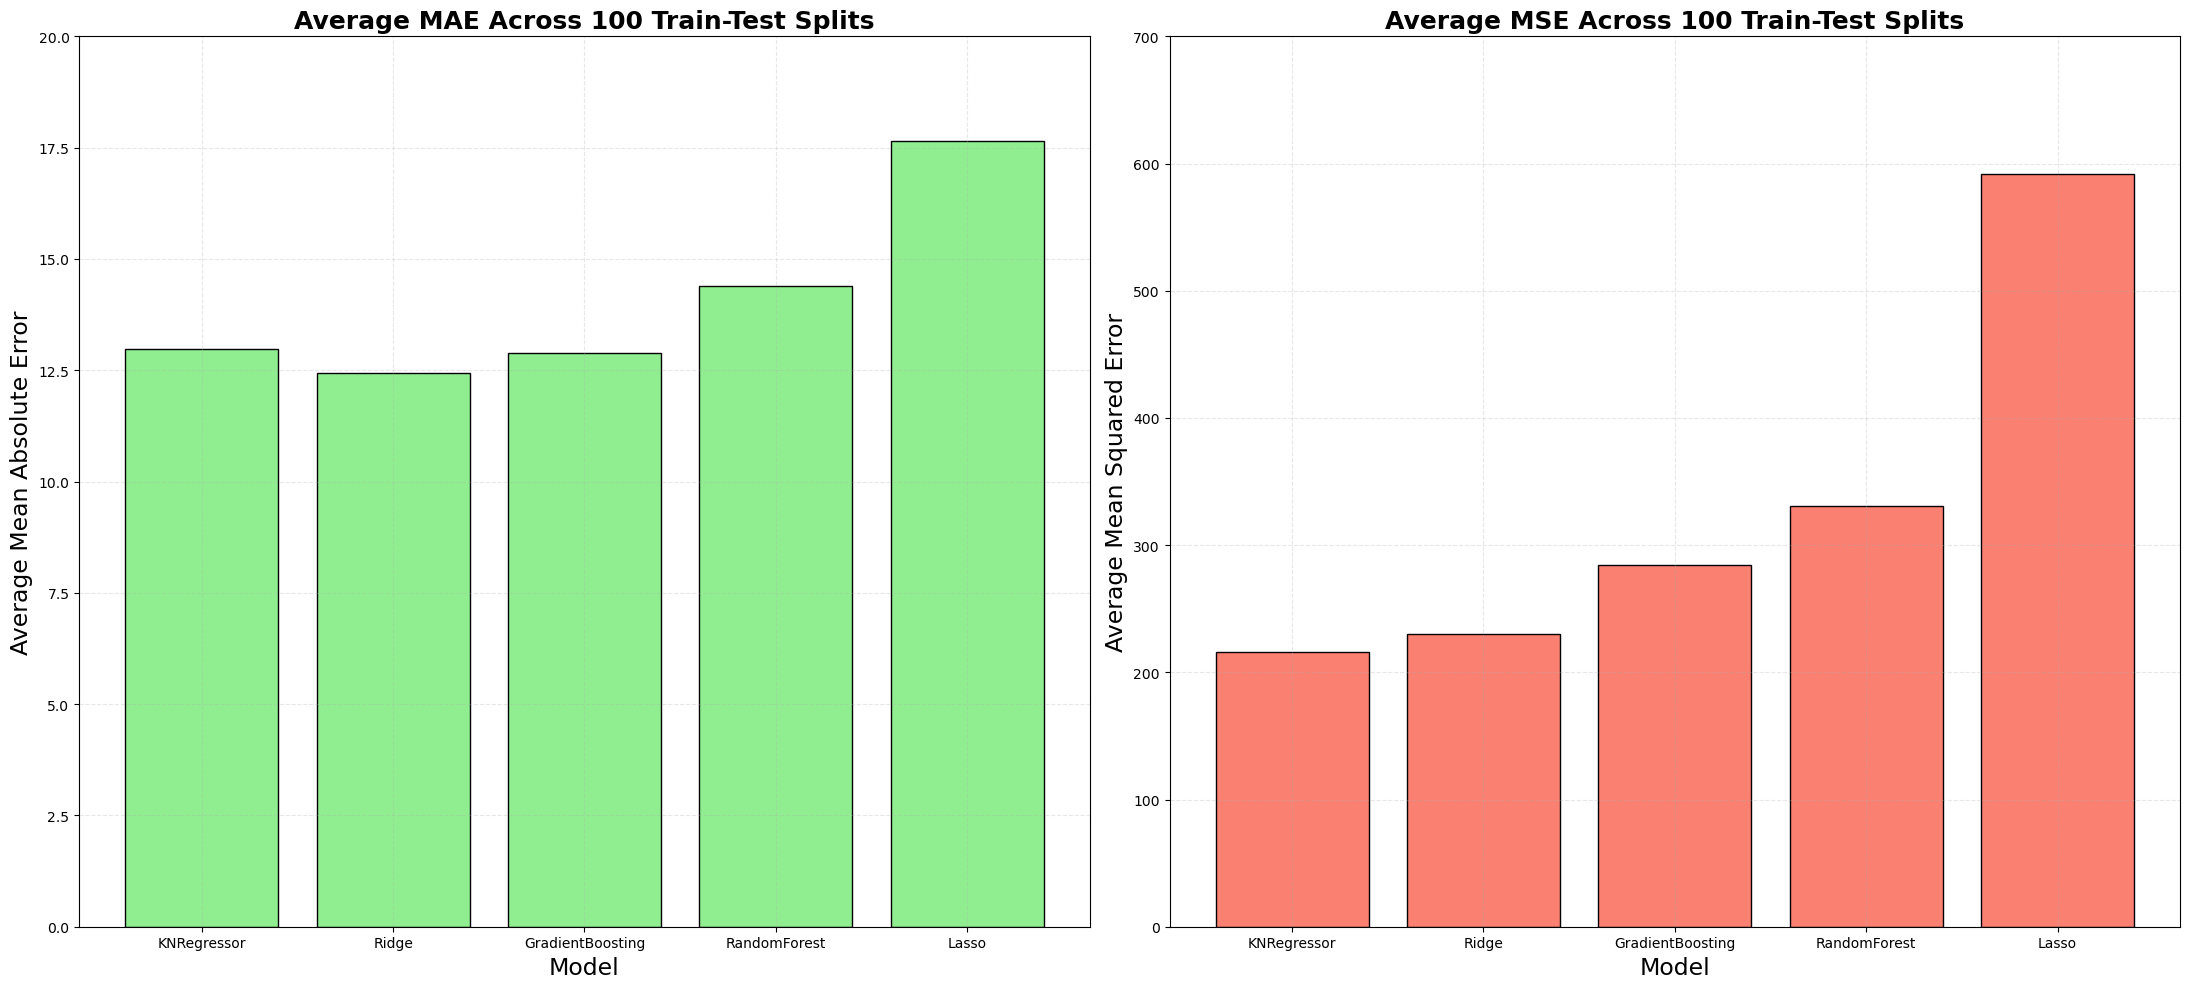

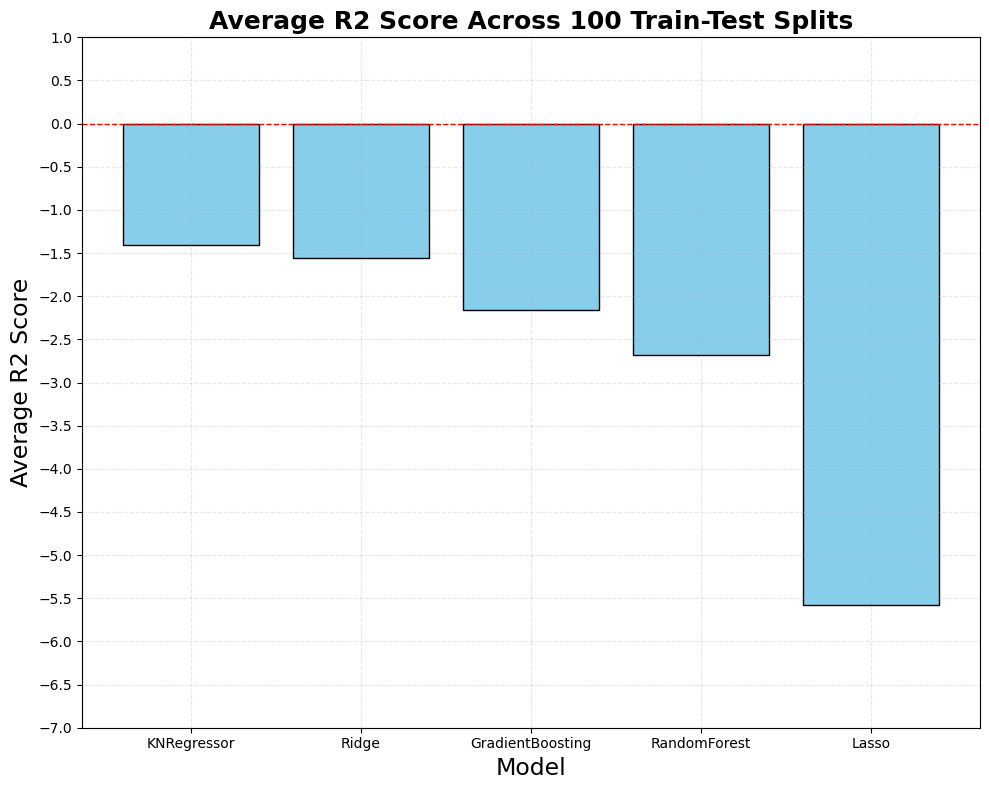

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define consistent colors for each metric
color_mae = 'lightgreen'
color_mse = 'salmon'
color_r2 = 'skyblue'

# Create bar plots for MAE and MSE in one figure
fig, axes = plt.subplots(1, 2, figsize=(22, 10))

# MAE
axes[0].bar(results_df['Model'], results_df['MAE'], color=color_mae, edgecolor='black')
axes[0].set_title('Average MAE Across 100 Train-Test Splits', fontsize=18, fontweight='bold')
axes[0].set_xlabel('Model', fontsize=17)
axes[0].set_ylabel('Average Mean Absolute Error', fontsize=17)
axes[0].set_ylim([0, 20])
axes[0].grid(True, linestyle='--', alpha=0.3)

# MSE
axes[1].bar(results_df['Model'], results_df['MSE'], color=color_mse, edgecolor='black')
axes[1].set_title('Average MSE Across 100 Train-Test Splits', fontsize=18, fontweight='bold')
axes[1].set_xlabel('Model', fontsize=17)
axes[1].set_ylabel('Average Mean Squared Error', fontsize=17)
axes[1].set_ylim([0, 700])
axes[1].grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
plt.bar(results_df['Model'], results_df['R2'], color=color_r2, edgecolor='black')
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Add zero line
plt.title('Average R2 Score Across 100 Train-Test Splits', fontsize=18, fontweight='bold')
plt.xlabel('Model', fontsize=17)
plt.ylabel('Average R2 Score', fontsize=17)
plt.ylim([-0.5, 0.5])
plt.yticks(np.arange(-7, 1.1, 0.5))
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

### model 4: smiles clusters, smiles features, time, temp

In [34]:
# Apply function to dataset
mol_features = model_2_test['passivator_smiles'].apply(compute_molecular_features)

# Convert list to DataFrame
mol_features_df = pd.DataFrame(mol_features.tolist(), 
                               columns=[
                                   'MolWt', 'ExactMolWt', 'LogP', 'TPSA', 'NumValenceElectrons',
                                   'NumRotBonds', 'NumHBA', 'NumHBD', 'FractionCSP3', 'AromaticRings',
                                   'SaturatedRings', 'Heteroatoms', 'HeavyAtoms', 'SpiroAtoms', 
                                   'BridgeheadAtoms', 'FpDensityMorgan1', 'FpDensityMorgan2', 
                                   'FpDensityMorgan3', 'QED', 'LipinskiHBA', 
                                   'LipinskiHBD', 'NumRings', 'NumAmideBonds', 'BalabanJ', 
                                   'BertzCT', 'Chi0', 'Chi1', 'Chi2n', 'Kappa1', 'Kappa2'
                               ],
                               index=model_2_test.index)

# Merge with original dataset
model_4_test = pd.concat([model_2_test.copy(), mol_features_df], axis=1)
model_4_test = model_4_test.dropna(subset=['passivator_smiles'])
model_4_test.shape

(9, 45)

In [35]:
# Apply function to dataset
mol_features = model_2_train['passivator_smiles'].apply(compute_molecular_features)

# Convert list to DataFrame
mol_features_df = pd.DataFrame(mol_features.tolist(), 
                               columns=[
                                   'MolWt', 'ExactMolWt', 'LogP', 'TPSA', 'NumValenceElectrons',
                                   'NumRotBonds', 'NumHBA', 'NumHBD', 'FractionCSP3', 'AromaticRings',
                                   'SaturatedRings', 'Heteroatoms', 'HeavyAtoms', 'SpiroAtoms', 
                                   'BridgeheadAtoms', 'FpDensityMorgan1', 'FpDensityMorgan2', 
                                   'FpDensityMorgan3', 'QED', 'LipinskiHBA', 
                                   'LipinskiHBD', 'NumRings', 'NumAmideBonds', 'BalabanJ', 
                                   'BertzCT', 'Chi0', 'Chi1', 'Chi2n', 'Kappa1', 'Kappa2'
                               ],
                               index=model_2_train.index)

# Merge with original dataset
model_4_train = pd.concat([model_2_train.copy(), mol_features_df], axis=1)
model_4_train = model_4_train.dropna(subset=['passivator_smiles'])
model_4_train.shape

(68, 45)

In [36]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

smiles_feature=[
   'MolWt', 'ExactMolWt', 'LogP', 'TPSA', 'NumValenceElectrons',
   'NumRotBonds', 'NumHBA', 'NumHBD', 'FractionCSP3', 'AromaticRings',
   'SaturatedRings', 'Heteroatoms', 'HeavyAtoms', 'SpiroAtoms', 
   'BridgeheadAtoms', 'FpDensityMorgan1', 'FpDensityMorgan2', 
   'FpDensityMorgan3', 'QED', 'LipinskiHBA', 
   'LipinskiHBD', 'NumRings', 'NumAmideBonds', 'BalabanJ', 
   'BertzCT', 'Chi0', 'Chi1', 'Chi2n', 'Kappa1', 'Kappa2'
]

# Define features and target
X_train = model_4_train[['retained_percentage_cont', 'Cluster', 'time', 'temperature'] + smiles_feature]
y_train = model_4_train['retained_percentage_tret']
X_test = model_4_test[['retained_percentage_cont', 'Cluster', 'time', 'temperature'] + smiles_feature]
y_test = model_4_test['retained_percentage_tret']

X_train = pd.get_dummies(X_train, columns=['Cluster'], drop_first=False)
X_test = pd.get_dummies(X_test, columns=['Cluster'], drop_first=False)

# Define parameter grids for each model
param_grids = {
    'RandomForest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    },
    'GradientBoosting': {
        'n_estimators': [100, 200, 500],
        'max_depth': [3, 5, 10],
        'learning_rate': [0.01, 0.1, 0.2]
    },
    'Lasso': {
        'alpha': [0.1, 1, 10, 100],
        'max_iter': [1000, 5000]
    },
    'Ridge': {
        'alpha': [0.1, 1, 10, 100]
    },
    'KNRegressor': {
        'n_neighbors': [3, 5, 10, 20],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    }
}

# Initialize models
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'Lasso': Lasso(random_state=42),
    'Ridge': Ridge(random_state=42),
    'KNRegressor': KNeighborsRegressor()
}

# Store the results
model_results = []

# Iterate over models and perform GridSearchCV
for model_name, model in models.items():
    print(f"Training and tuning {model_name}...")
    grid_search = GridSearchCV(
        estimator=model, 
        param_grid=param_grids[model_name], 
        cv=5, 
        n_jobs=-1, 
        scoring='r2'
    )
    
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.best_estimator_.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    model_results.append({
        'Model': model_name,
        'Best Parameters': grid_search.best_params_,
        'MSE': mse,
        'MAE': mae,
        'R2': r2
    })

# Display the results in a DataFrame
results_df = pd.DataFrame(model_results).sort_values(by='R2', ascending=False)
print(results_df)

# Feature Importance for tree-based models
for model_name, model in models.items():
    if hasattr(grid_search.best_estimator_, 'feature_importances_'):
        feature_importances = pd.DataFrame({
            'Feature': X.columns,
            'Importance': grid_search.best_estimator_.feature_importances_
        }).sort_values(by='Importance', ascending=False)
        
        print(f"\nTop Features for {model_name}:")
        print(feature_importances.head(10))

Training and tuning RandomForest...
Training and tuning GradientBoosting...
Training and tuning Lasso...
Training and tuning Ridge...
Training and tuning KNRegressor...
              Model                                    Best Parameters  \
4       KNRegressor  {'n_neighbors': 10, 'p': 2, 'weights': 'uniform'}   
1  GradientBoosting  {'learning_rate': 0.01, 'max_depth': 5, 'n_est...   
0      RandomForest  {'bootstrap': True, 'max_depth': None, 'min_sa...   
2             Lasso                   {'alpha': 100, 'max_iter': 1000}   
3             Ridge                                     {'alpha': 100}   

           MSE        MAE         R2  
4    85.376046   7.546444  -0.254583  
1   169.439647  10.481731  -1.489879  
0   214.756553  11.748367  -2.155801  
2  3590.610756  34.019470 -51.763249  
3  3641.471585  37.970591 -52.510638  


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.084e+03, tolerance: 1.272e+00
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.771e+03, tolerance: 2.267e+00
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.542e+03, toler

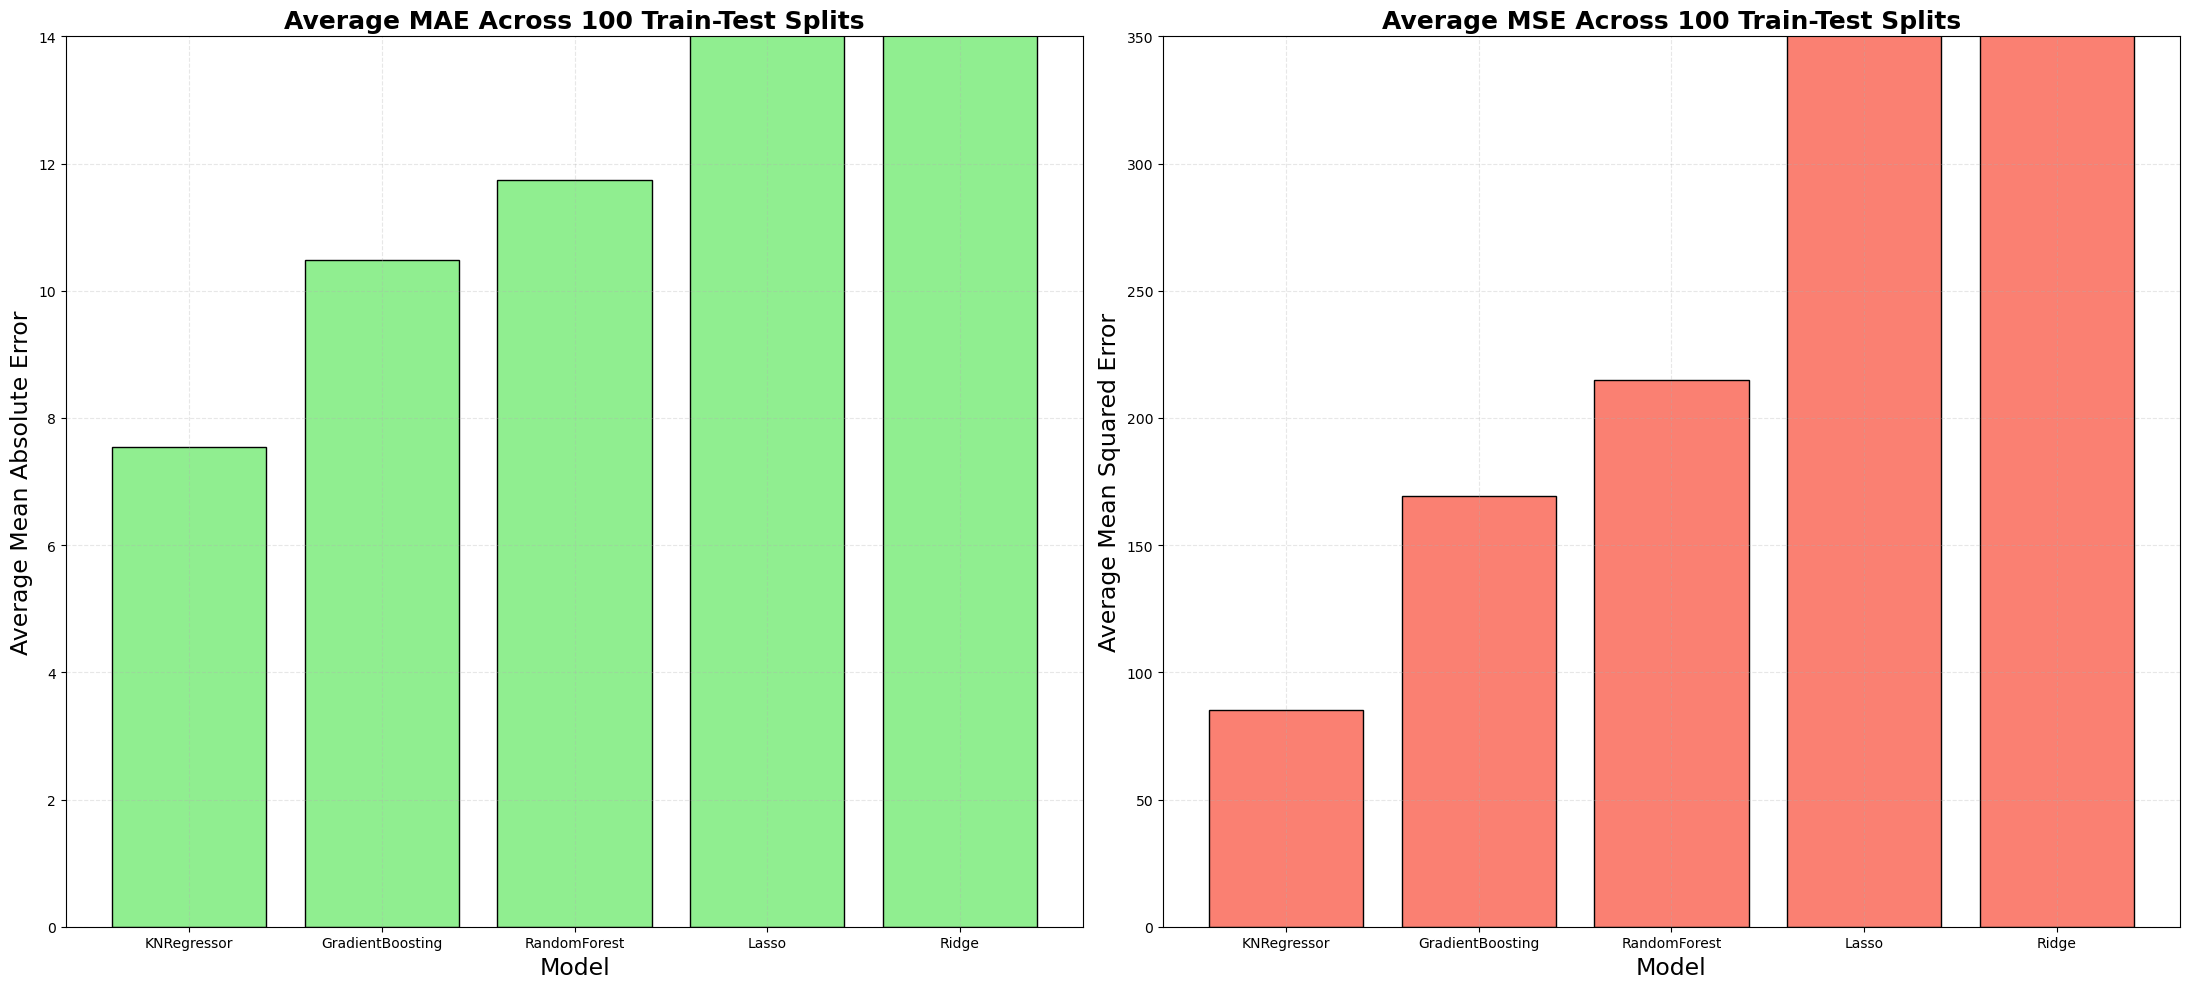

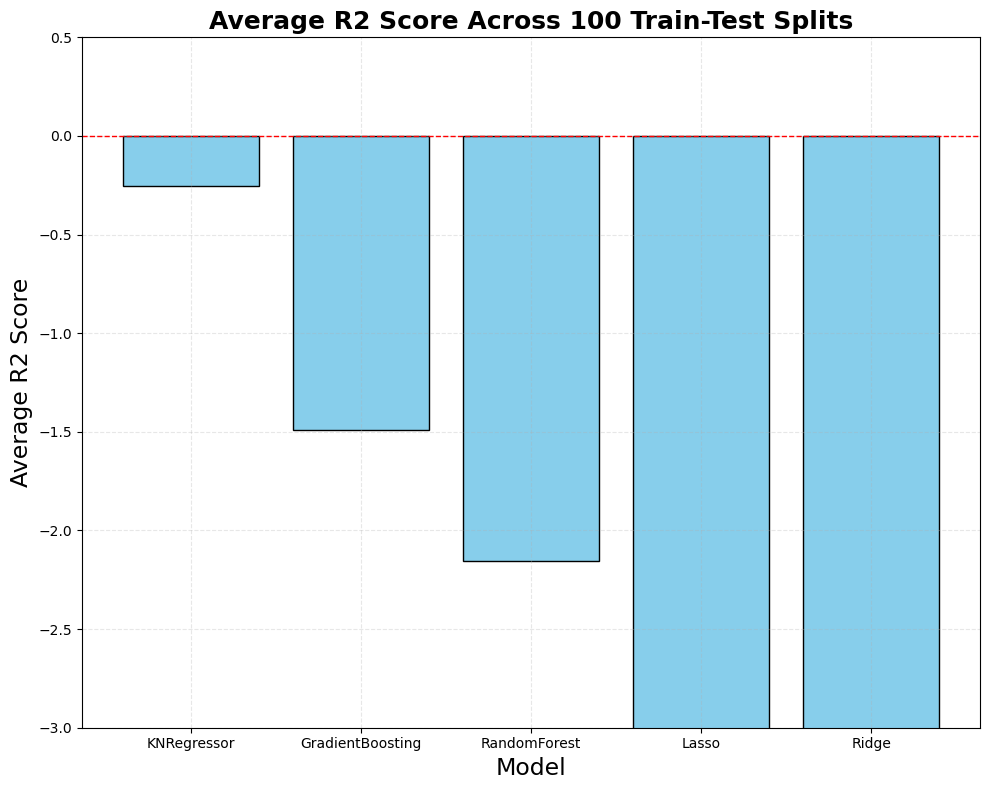

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define consistent colors for each metric
color_mae = 'lightgreen'
color_mse = 'salmon'
color_r2 = 'skyblue'

# Create bar plots for MAE and MSE in one figure
fig, axes = plt.subplots(1, 2, figsize=(22, 10))

# MAE
axes[0].bar(results_df['Model'], results_df['MAE'], color=color_mae, edgecolor='black')
axes[0].set_title('Average MAE Across 100 Train-Test Splits', fontsize=18, fontweight='bold')
axes[0].set_xlabel('Model', fontsize=17)
axes[0].set_ylabel('Average Mean Absolute Error', fontsize=17)
axes[0].set_ylim([0, 14])
axes[0].grid(True, linestyle='--', alpha=0.3)

# MSE
axes[1].bar(results_df['Model'], results_df['MSE'], color=color_mse, edgecolor='black')
axes[1].set_title('Average MSE Across 100 Train-Test Splits', fontsize=18, fontweight='bold')
axes[1].set_xlabel('Model', fontsize=17)
axes[1].set_ylabel('Average Mean Squared Error', fontsize=17)
axes[1].set_ylim([0, 350])
axes[1].grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
plt.bar(results_df['Model'], results_df['R2'], color=color_r2, edgecolor='black')
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Add zero line
plt.title('Average R2 Score Across 100 Train-Test Splits', fontsize=18, fontweight='bold')
plt.xlabel('Model', fontsize=17)
plt.ylabel('Average R2 Score', fontsize=17)
plt.ylim([-0.5, 0.5])
plt.yticks(np.arange(-3, 0.6, 0.5))
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [38]:
model_1_train.shape, model_1_test.shape

((512, 15), (39, 15))

In [39]:
model_2_train.shape, model_2_test.shape

((68, 15), (9, 15))

In [40]:
model_3_train.shape, model_3_test.shape

((512, 45), (39, 45))

In [41]:
model_4_train.shape, model_4_test.shape

((68, 45), (9, 45))

In [91]:
# Data from the four different attempts
model_names = ["RandomForest", "GradientBoosting", "Lasso", "Ridge", "KNRegressor"]
metrics = ["MSE", "R2"]

# MSE and R2 scores for each attempt
scores = {
    "RandomForest": [
        [171.031879, -0.901660],
        [191.609772, -1.815664],
        [330.889302, -2.679074],
        [214.756553, -2.155801]
    ],
    "GradientBoosting": [
        [119.300447, -0.326471],
        [83.968464, -0.233898],
        [284.624590, -2.164669],
        [169.439647, -1.489879]
    ],
    "Lasso": [
        [136.402703, -0.516627],
        [122.894854, -0.805913],
        [592.010238, -5.582412],
        [3590.610756, -51.763249]
    ],
    "Ridge": [
        [134.000581, -0.489918],
        [264.317363, -2.884087],
        [229.799261, -1.555080],
        [3641.471585, -52.510638]
    ],
    "KNRegressor": [
        [220.430102, -1.450906],
        [76.576361, -0.125273],
        [215.907170, -1.400617],
        [85.376046, -0.254583]
    ]
}

# Prepare data for tabular visualization
table_data = []

for model in model_names:
    for i, metric in enumerate(metrics):
        row = [model, metric] + [round(scores[model][j][i], 2) for j in range(4)]
        table_data.append(row)

table_df = pd.DataFrame(
    table_data,
    columns=["Model", "Metric", "Approach 1", "Approach 2", "Approach 3", "Approach 4"]
)

In [93]:
table_df.to_csv('prediction_2.csv')

In [95]:
table_df

,Model,Metric,Approach 1,Approach 2,Approach 3,Approach 4
0,RandomForest,MSE,171.03,191.61,330.89,214.76
1,RandomForest,R2,-0.90,-1.82,-2.68,-2.16
2,GradientBoosting,MSE,119.30,83.97,284.62,169.44
3,GradientBoosting,R2,-0.33,-0.23,-2.16,-1.49
4,Lasso,MSE,136.40,122.89,592.01,3590.61
5,Lasso,R2,-0.52,-0.81,-5.58,-51.76
6,Ridge,MSE,134.00,264.32,229.80,3641.47
7,Ridge,R2,-0.49,-2.88,-1.56,-52.51
8,KNRegressor,MSE,220.43,76.58,215.91,85.38
9,KNRegressor,R2,-1.45,-0.13,-1.40,-0.25
